# JS02 - Pemahaman Data dan Pra Pengolahan Data
### Praktikum 1
# Pengantar
Pada prarktikum ini kita akan belajar tentang dasar-dasar EDA. Dataset yang digunakan adalah dataset publik Titanic.

# Langkah 0 - Persiapan Lingkungan

(Opsional) Lakukan instalasi library pandas, numpy, dan matplotlib. Pandas merupakan library untuk manipulasi data tabular. Numpy digunakan untuk manipulasi angka. Matplotlib digunakan untuk kebutuhan visualisasi data.

In [ ]:
!pip install -q pandas matplotlib numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
  from google.colab import output
  IN_COLAB = True
except:
  IN_COLAB = False

# Langkah 1 - Memuat Data

In [ ]:
!wget -O Titanic-Dataset.csv https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FiFp69WYCuXGdWwLZg5Gn%2FTitanic-Dataset.csv?alt=media
if IN_COLAB:
  output.clear()

df = pd.read_csv('Titanic-Dataset.csv')
df.head() #df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Langkah 2 - Inspeksi Data

Pada tahap ini, kita lakukan pemahaman terhadap data berdasarkan nilai-nilai stastik dan kondisi data. Beberapa hal yang biasa dilakukan diantara adalah,
1. Pengecekan dimensi → Untuk mengetahui jumlah baris dan kolom dari data. Pada data tabular, cara ini berguna untuk mendapatkan informasi jumlah data dan variabel.
2. Pengecekan tipe data → Untuk mengetahui tipe data setiap variabel. Bermanfaat untuk proses pengolahan selanjutnya
3. Pengecekan nilai statistik deskriptif → Untuk mengetahui ukuran kecenderuangan memusat atau menyebarnya suatu data.

###  Pengecekan Dimensi

In [ ]:
df.shape

(891, 12)

### Pengecekan Tipe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


untuk lebih mengetahui jumlah data yang hilang untuk setiap kolom, gunakan perintah,

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Ringkasan Nilai Statistik

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Langkah 3 - Inspeksi Visual
Inspeksi visual dilakukan untuk mengetahui pola data secara visual. Dengan cara ini kita dapat menentukan langkah pra pengolahan data dengan lebih tepat. Inspeksi visual yang akan dilakukan adalah,
1. Inspeksi distribusi data melalui histogram
2. Inspeksi outlier melalui boxplot
3. Inspeksi korelasi antar variabel dengan heatmap dan scatterplot
### Inspeksi Distribusi Data

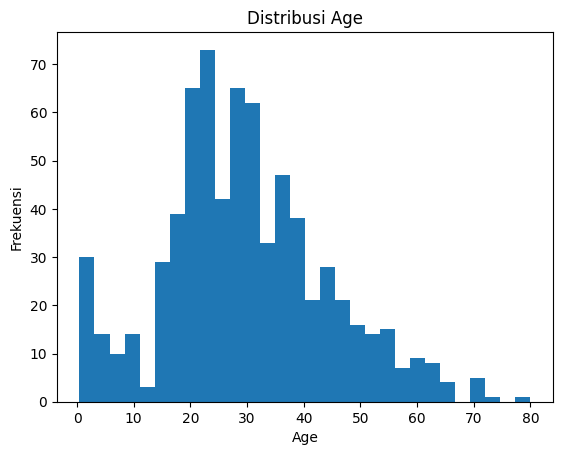

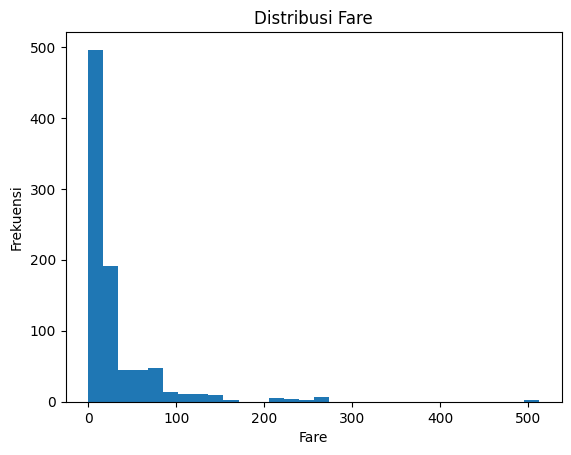

In [ ]:
num_cols = ['Age','Fare']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

### Inspeksi Outlier
Inspeksi terhadap nilai-nilai outlier juga penting dalam proses EDA. Outlier dapat mengakibatkan pergeseran distribusi data yang dapat berdampak pada proses pelatihan model. Pada praktikum ini kita akan melakukan pengecekan outlier pada 1 variabel saja, yaitu Fare.

Visualisasi yang paling mudah untuk digunakan dalam mendeteksi outlier adalah dengan menggunakan boxplot.



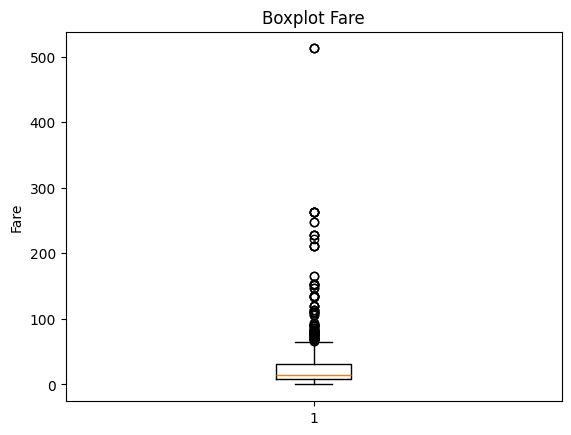

In [ ]:
plt.figure()
plt.boxplot(df['Fare'].dropna(), vert=True)
plt.title('Boxplot Fare')
plt.ylabel('Fare')
plt.show()

### Inspeksi Komposisi Variabel Kualitatif
Dengan menggunakan boxplot, kita hanya mampu melakukan inspeksi pada variabel kuantitatif. Namun terkadang kita juga perlu melakukan inspeksi pada variabel kualitatif. Salah satu inspeksi yang dapat kita lakukan pada variabel kualitatif adalah mencari tahu jumlah data tiap kategorinya. Kita dapat menggunakan barchart dalam konteks ini.

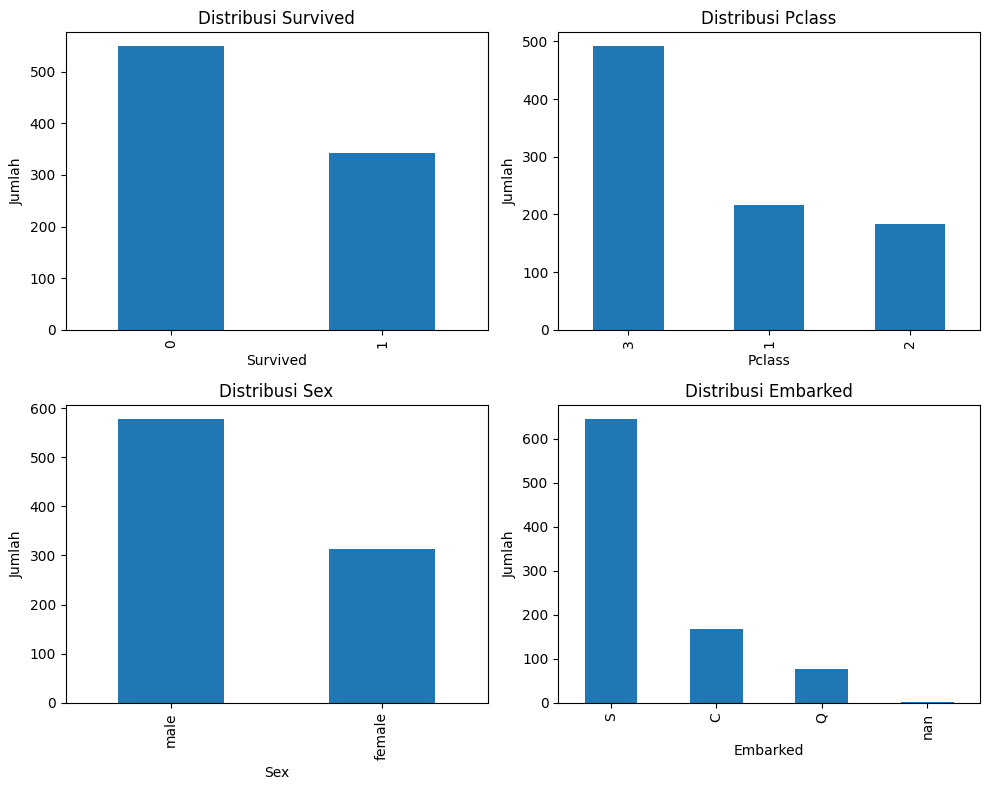

In [ ]:
cat_cols = ['Survived','Pclass','Sex','Embarked']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

### Inspeksi Korelasi
Nilai korelasi digunakan untuk mengetahui apakah terdapat hubungan saling mempengaruhi antar variabel. Nilai ini cukup penting untuk melihat hubungan antara variabel independen dengan dependennya. Jika nilai korelasi tidak cukup, maka kita perlu melakukan tindakan lanjutan salah satunya dengan tidak menggunakan variabel independen tersebut dalam proses selanjutnya.

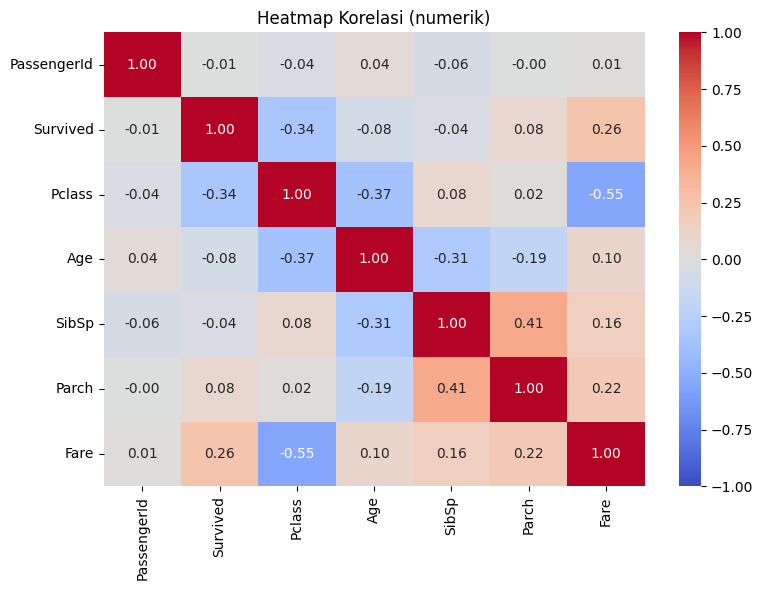

In [ ]:
import seaborn as sns

num_only = df.select_dtypes(include=[np.number])
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8, 6)) # Increased figure size for better readability
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f") # Use seaborn.heatmap with annotation
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

Secara ringkat kita juga dapat melakukan inspeksi korelasi dengan hasil data tabular. Sebagai contoh, variabel Survived adalah variabel dependen yang akan menjadi fokus. Gunakan perintah,

In [ ]:
corr['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


### Scatter Plot
Scatter plot biasanya digunakan untuk mendapatkan informasi distribusi variabel dan juga dapat digunakan untuk mengetahui hubungan antar variabel. Hubungan ini dapat dijelaskan melalui pola-pola linier maupun non-linier.

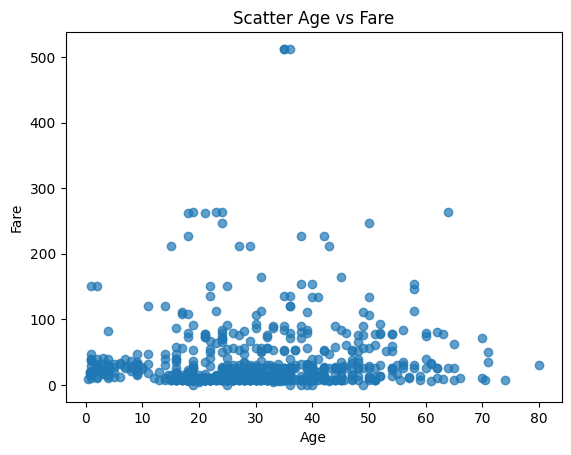

In [ ]:
plt.figure()
surv_map = {0:'No', 1:'Yes'}
plt.scatter(df['Age'], df['Fare'], alpha=0.7)
plt.xlabel('Age'); plt.ylabel('Fare')
plt.title('Scatter Age vs Fare')
plt.show()